In [2]:
"""
JUPYTER NOTEBOOK 1: EXERCISES

In this notebook, you'll explore:
1. Z-scores
2. Law of Large Numbers (LLN)
3. Central Limit Theorem (CLT)

We assume we have an industrial machine that produces rods of length ~ N(50, 2^2).
We'll walk through tasks to see how sample sizes affect our estimates.

You'll see hints about which methods to use, but you'll need to fill in the code.
"""

# =========================
# 1. SETUP
# =========================

# TODO: import the necessary libraries:
# HINTS:
#    - numpy for numerical operations
#    - matplotlib.pyplot for plotting
#    - from scipy.stats import norm (for normal distribution methods)
#    - optionally set a random seed for reproducibility

# import numpy for numerical operations
import numpy as np

# import matplotlib for plotting; 'pyplot' is a convenient module for creating plots
import matplotlib.pyplot as plt

# import the 'norm' class from scipy.stats, which provides methods for the Normal distribution
from scipy.stats import norm

# %matplotlib inline makes plots display directly in the notebook
%matplotlib inline

# set a random seed for reproducibility
np.random.seed(42)


# -------------------------
# We'll define the true parameters of our "population."
# We have rods with mean length 50 cm and standard deviation 2 cm.
# true_mean = 50.0
# true_std = 2.0

# <YOUR CODE HERE: define true_mean and true_std>
true_mean = 50.0
true_std = 2.0


Single simulated rod length: 51.29537707620138
Z-score of this rod length: 0.6476885381006916


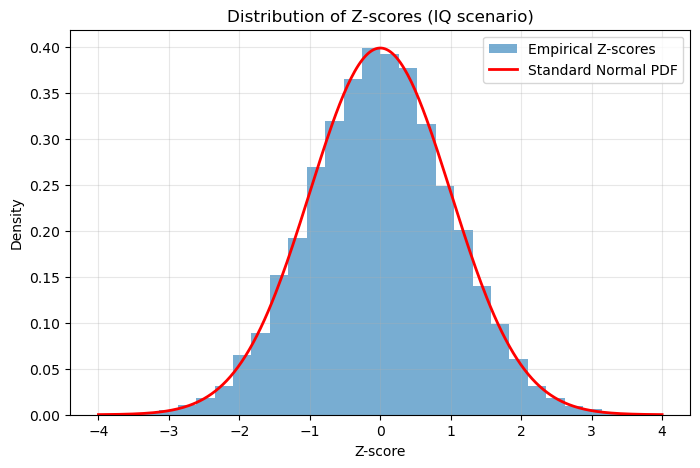

In [5]:

# =========================
# 2. Z-SCORES
# =========================

"""
TASK:
1. Simulate one rod length from our normal distribution (mean=50, std=2).
   Use: norm.rvs(loc=?, scale=?, size=?).

2. Compute its z-score. (z = (x - mean) / std).

3. Simulate many rod lengths (e.g., N=10_000) and compute their z-scores.
   - Plot a histogram of those z-scores and compare with the standard normal pdf.
     * HINT: use plt.hist(..., density=True) to get density.
     * HINT: norm.pdf(x_values, loc=0, scale=1) for standard normal PDF.
"""

# TODO: Step 1: simulate a single rod length
single_rod_length = norm.rvs(loc=true_mean, scale=true_std, size=1)[0]
print("Single simulated rod length:", single_rod_length)

# TODO: Step 2: compute its z-score
z_single = (single_rod_length - true_mean) / true_std
print("Z-score of this rod length:", z_single)

# TODO: Step 3: simulate many rod lengths, compute z-scores, plot histogram vs. standard normal PDF

# Number of rod lengths to simulate
N = 10000

# Generate N random rod lengths
rod_lengths = norm.rvs(loc=true_mean, scale=true_std, size=N)

# Compute the z-scores of each simulated rod length
z_scores = (rod_lengths - true_mean) / true_std

# Plotting
# Intialise a figure
plt.figure(figsize=(8,5))

# Plot a histogram (normalised to show PD rather than counts)
plt.hist(z_scores, bins=30, density=True, alpha=0.6, label='Empirical Z-scores')

# Create a grid of x-values for plotting the theoretical standard normal pdf
x_values = np.linspace(-4, 4, 300)

# Produce the theoretical standard normal pdf
standard_pdf = norm.pdf(x_values, 0, 1)

# Overlay the standard pdf
plt.plot(x_values, standard_pdf, 'r-', lw=2, label='Standard Normal PDF')

plt.title("Distribution of Z-scores (IQ scenario)")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

Sample size vs. sample mean:
n=   10 -> sample mean=50.24
n=   50 -> sample mean=50.06
n=  100 -> sample mean=49.63
n=  500 -> sample mean=50.04
n= 1000 -> sample mean=49.96
n= 5000 -> sample mean=50.04
n=10000 -> sample mean=50.01


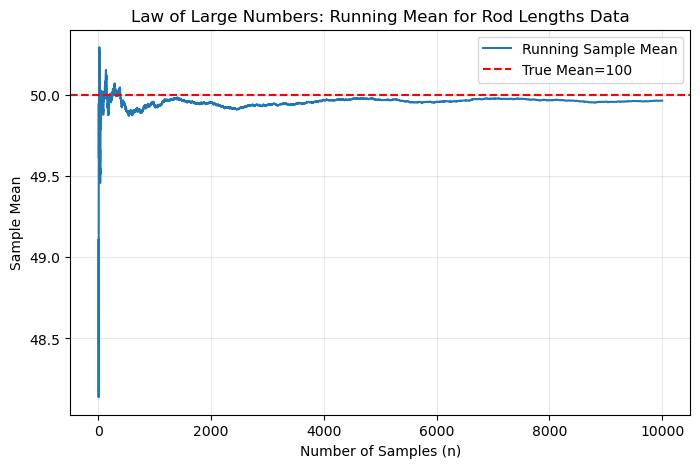

In [6]:

# =========================
# 3. LAW OF LARGE NUMBERS
# =========================

"""
TASK:
1. Illustrate how the sample mean converges to the true mean as the sample size grows.
   - For sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000], do:
     * Generate 'n' random samples from the normal distribution
     * Compute the mean
     * Store it
   - Print or plot those sample means to see if they approach 50.

2. Create a large sample (e.g., size=10_000) in one go, then compute the running mean 
   up to each index i (from 1 to 10,000). 
   - Plot the running mean and compare it to the true mean (50) with a horizontal line.
   - HINT: np.cumsum(...) gives a cumulative sum; to get the mean up to index i, 
     you can do cumulative_sum[i] / (i+1) or something similar.
"""

# TODO: Step 1: sample_sizes = [...]
# Define various sample sizes to iterate over
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]

# Define a list to store the means for each smample size
means_list = []

# For each n in sample_sizes, generate normal samples, compute mean
for n in sample_sizes:
    
    # generate 'n' rod lengths scores
    sample = norm.rvs(loc=true_mean, scale=true_std, size=n)

    # compute the sample mean
    sample_mean = np.mean(sample)

    # Store the sample mean in the means list
    means_list.append(sample_mean)

# Display how each sample mean compares to the true mean
print("Sample size vs. sample mean:")
for s, m in zip(sample_sizes, means_list):
    print(f"n={s:5d} -> sample mean={m:.2f}")

# TODO: Step 2: Single large sample. Compute running mean. Plot it against the true mean.

# Define large single sample size
N = 10000

# Generate a large sample of size N
large_sample = norm.rvs(loc=true_mean, scale=true_std, size=N)

# Compute cumulative sum element-wise
cumsum_vals = np.cumsum(large_sample)

# The mean at index i is the cumulative sum / i + 1
running_means = cumsum_vals / np.arange(1, N+1)

# Plot the results
# Create the figure
plt.figure(figsize=(8,5))

# Plot the running sample mean as a line
plt.plot(running_means, label='Running Sample Mean')

# Draw a horizontal line at the true mean (as a reference)
plt.axhline(true_mean, color='red', linestyle='--', label='True Mean=100')
plt.title("Law of Large Numbers: Running Mean for Rod Lengths Data")
plt.xlabel("Number of Samples (n)")
plt.ylabel("Sample Mean")
plt.grid(alpha = 0.3)
plt.legend()
plt.show()


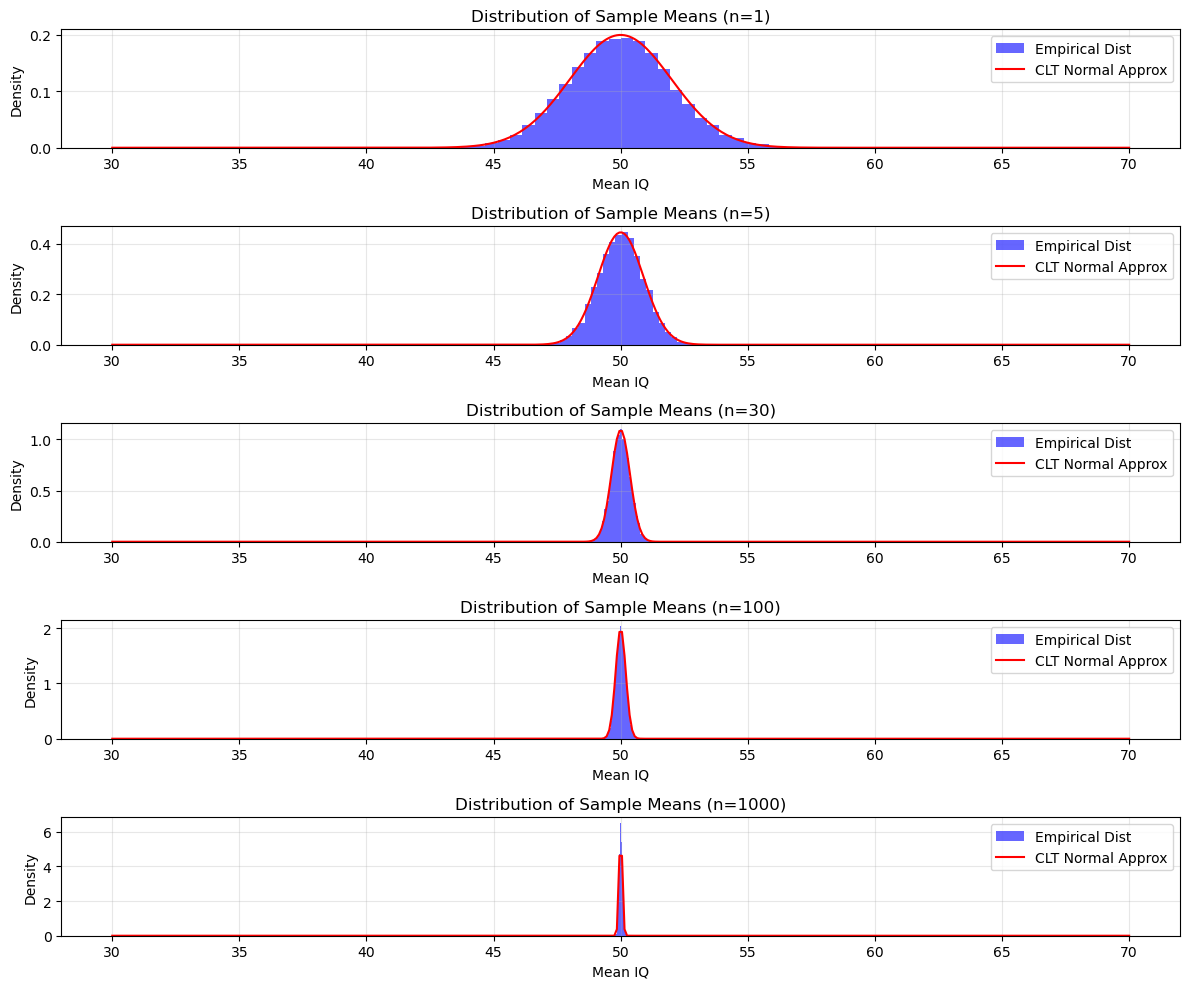

In [8]:
# =========================
# 4. CENTRAL LIMIT THEOREM
# =========================

"""
TASK:
1. We'll pick various sample sizes, e.g. [1, 5, 30, 100, 1000].
2. For each n, repeatedly (e.g. 10_000 times) draw n samples from N(50, 2),
   compute the sample mean, store it in a list.
3. Plot a histogram of these sample means. Compare it to the normal distribution
   with mean=50, std=2/sqrt(n). 
   - HINT: norm.pdf(...) for the PDF, and pass loc=?, scale=?
"""

# TODO: define sample_sizes for the CLT demonstration
n_experiments = 10000
sample_sizes_clt = [1, 5, 30, 100, 1000]

# for each n in sample_sizes:
#   - create a loop for num_experiments times
#   - generate sample of size n
#   - compute mean
#   - store
# - plot histogram and compare with theoretical PDF


# Initialise the figure
plt.figure(figsize=(12, 10))

# For each sample size (i), iterate over n experiments
for i, n in enumerate(sample_sizes_clt, start=1):
    means_n = []
    
    for _ in range(n_experiments):
        
        # At each iteration, we draw a sample of size n from N(50, 2)
        sample = norm.rvs(loc=true_mean, scale=true_std, size=n)

        # Compute sample mean and store it in the means list
        means_n.append(np.mean(sample))
   
   # Convert to an array
    means_n = np.array(means_n)
    
    # Create a subplot fot each specified sample size
    plt.subplot(len(sample_sizes_clt), 1, i)
    
    # Create a histogram of the sample means for this (i) current sample size
    plt.hist(means_n, bins=30, density=True, alpha=0.6, color='blue', label='Empirical Dist')
    
    # Define x-values to plot the theoretical normal distribution
    x_vals = np.linspace(30, 70, 400)
    
    # Compute the theoretical PDF for the sample means:
    # N(true_mean, true_std/sqrt(n))
    theoretical_pdf = norm.pdf(x_vals, loc=true_mean, scale=true_std/np.sqrt(n))
    
    plt.plot(x_vals, theoretical_pdf, 'r-', label='CLT Normal Approx')
    plt.title(f"Distribution of Sample Means (n={n})")
    plt.xlabel("Mean IQ")
    plt.ylabel("Density")
    plt.grid(alpha = 0.3)
    plt.legend()

plt.tight_layout()  # adjusts subplot spacing nicely
plt.show()

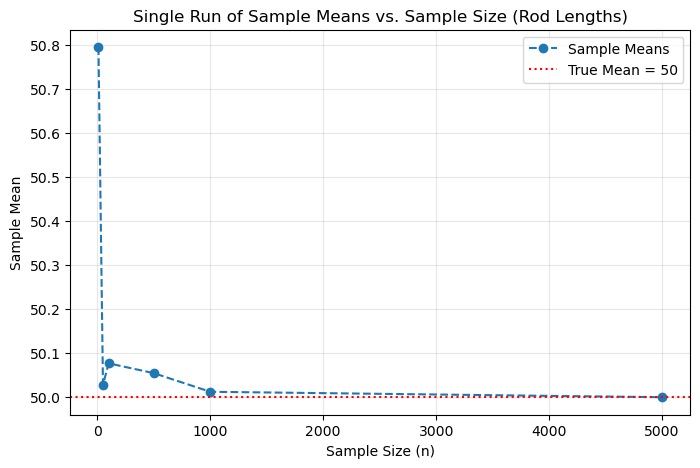

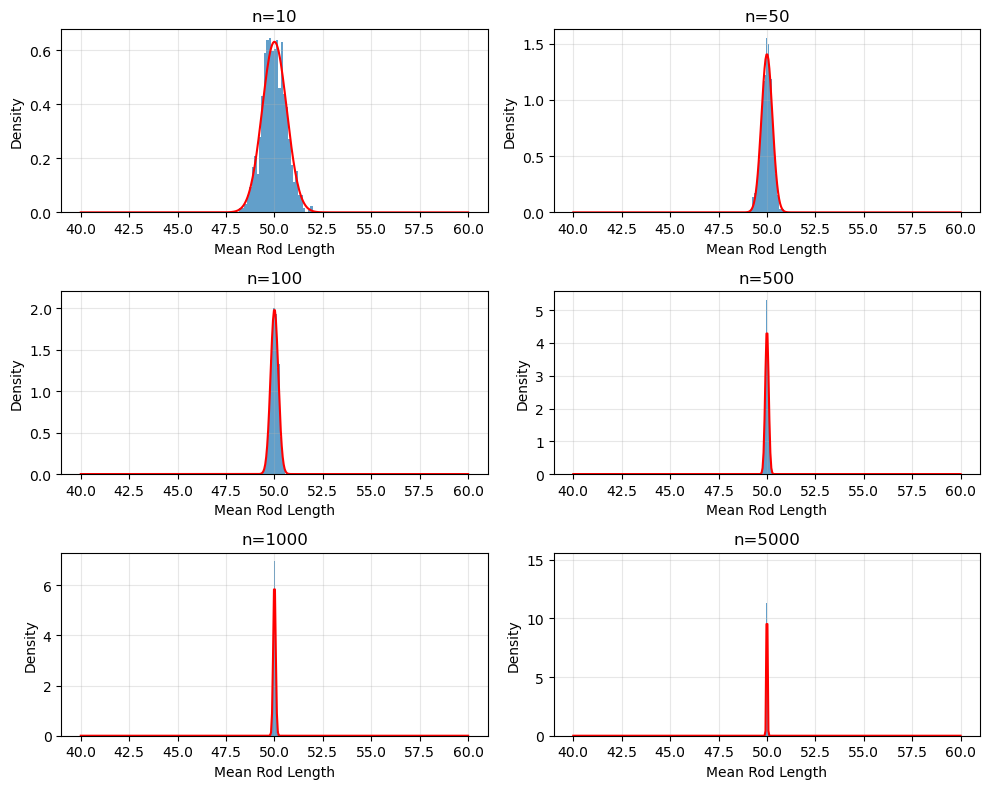

In [9]:
# =========================
# 5. PUTTING IT ALL TOGETHER
# =========================

"""
FINAL TASKS:
1. Create a single-run demonstration:
   - For sample_sizes = [10, 50, 100, 500, 1000, 5000]
     * For each n, generate a sample and compute its mean
     * Plot those means as a function of n, add a horizontal line at 50

2. Create a multiple-run demonstration:
   - For each n, do multiple runs (e.g. 1000) and plot the histogram of sample means 
     as we did in the CLT section, just more structured together.
"""

# TODO: implement the "single run" demonstration
sample_sizes_final = [10, 50, 100, 500, 1000, 5000]
means_single_run = []

# Iterate over each of the specified sample sizes
for n in sample_sizes_final:
    
    # draw n random rod lengths
    sample = norm.rvs(loc=true_mean, scale=true_std, size=n)

    # Compute the mean of the sample
    means_single_run.append(np.mean(sample))

# Initialise the figure
plt.figure(figsize=(8,5))

# Plot sample size against sample mean
plt.plot(sample_sizes_final, means_single_run, marker='o', linestyle='--', label='Sample Means')

# Draw a horizontal reference line of the true mean (50)
plt.axhline(true_mean, color='red', linestyle=':', label='True Mean = 50')
plt.title("Single Run of Sample Means vs. Sample Size (Rod Lengths)")
plt.xlabel("Sample Size (n)")
plt.ylabel("Sample Mean")
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

# TODO: implement the "multiple runs" demonstration

# Define the number of experiments
num_experiments_final = 1000

# Initialise the figure
plt.figure(figsize=(10, 8))

# Iterate over each sample size, performing n experiments for each
for i, n in enumerate(sample_sizes_final, start=1):
    all_means = []
    
    # Iterate over the defined number of experiments
    for _ in range(num_experiments_final):
        
        # Draw n rod length samples
        sample = norm.rvs(loc=true_mean, scale=true_std, size=n)

        # Compute the mean
        all_means.append(np.mean(sample))
    
    # For each specified sample size, produce a subplot
    plt.subplot(3, 2, i)

    # Draw a histogram of the sample means
    plt.hist(all_means, bins=30, density=True, alpha=0.7)

    # Define x-values for the theoretical distribution
    x_vals = np.linspace(40, 60, 400)
    
    # Calcultae the theoretical pdf for normal with mean=50, std=2/sqrt(n)
    theoretical_pdf = norm.pdf(x_vals, loc=true_mean, scale=true_std/np.sqrt(n))

    plt.plot(x_vals, theoretical_pdf, 'r-')
    plt.title(f"n={n}")
    plt.xlabel("Mean Rod Length")
    plt.grid(alpha = 0.3)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()
